# Visualize 

In [24]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
import matplotlib.pyplot as plt

 
# Create a new circuit with two qubits
qc = QuantumCircuit(2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
 
# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

In [10]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram


def oracle(circuit):
    # This oracle flips the sign of the state |11⟩
    circuit.cz(0, 1)  # Controlled-Z gate
def diffuser(circuit, n):
    # Apply Hadamard gates to all qubits
    circuit.h(range(n))
    # Apply the controlled-Z gate
    circuit.z(range(n))
    circuit.h(range(n))
    # Apply a controlled-X (CX) gate (also known as Toffoli gate)
    circuit.cx(0, 1)
    # Apply Hadamard gates again
    circuit.h(range(n))


In [11]:
def grovers_algorithm(n):
    circuit = QuantumCircuit(n)
    
    # Step 1: Initialize the qubits
    circuit.h(range(n))  # Apply Hadamard gates to create superposition

    # Number of iterations
    iterations = int((3.14 / 4) * (2**(n/2)))

    # Step 2: Apply oracle and diffuser repeatedly
    for _ in range(iterations):
        oracle(circuit)
        diffuser(circuit, n)

    # Step 3: Measure the qubits
    circuit.measure_all()
    return circuit


Measurement Counts: {'01': 250, '11': 259, '10': 250, '00': 265}


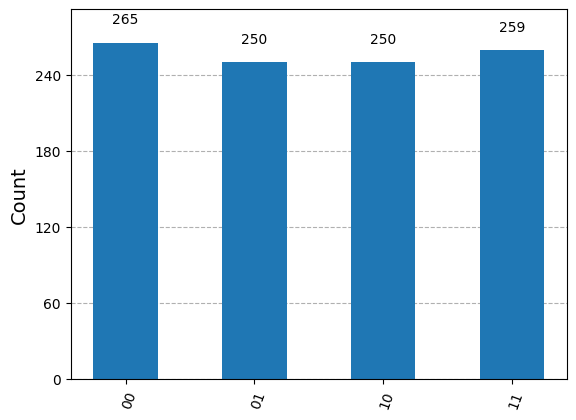

In [22]:
n = 2  
circuit = grovers_algorithm(n)

# Execute the circuit on a simulator
simulator = Aer.get_backend('aer_simulator')
new_circuit = transpile(circuit, simulator)

# Run the circuit on the simulator
job = simulator.run(new_circuit)

# Get the results from the job
result = job.result()

# Get the counts (measurement results)
counts = result.get_counts(new_circuit)

# Print the counts
print("Measurement Counts:", counts)

# Visualize the results
plot_histogram(counts)




In [33]:
import random
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram

# Function to implement classical search
def classical_search(target, items):
    for index, item in enumerate(items):
        if item == target:
            return index
    return -1

# Function to implement Grover's algorithm
def grovers_algorithm(target_index, n):
    # Create a Grover's algorithm circuit
    circuit = QuantumCircuit(n)  # n qubits and n classical bits for measurement
    
    # Apply Hadamard gates to all qubits to create superposition
    for qubit in range(n):
        circuit.h(qubit)
    
    # Oracle: Mark the target index
    # Invert the sign of the target state
    target_binary = format(target_index, f'0{n}b')  # Get binary representation of target index
    
    # Apply X gates to create the state |target>
    for i in range(n):
        if target_binary[i] == '0':
            circuit.x(i)

    # Apply controlled-controlled-X (CCX) gates for the oracle
    if n == 2:
        # Only need a CCX for a single target state
        circuit.ccx(0, 1, 2)  # 2 is not a qubit; we will correct this in the marking step
    elif n == 3:
        circuit.ccx(0, 1, 2)
    
    # Revert the X gates
    for i in range(n):
        if target_binary[i] == '0':
            circuit.x(i)

    # Apply Hadamard gates again
    for qubit in range(n):
        circuit.h(qubit)
    
    # Measure the qubits
    circuit.measure(range(n), range(n))
    
    return circuit

# Number of qubits (for a search space of size 4)
n = 2  # 2 qubits allow for a 4-state search (00, 01, 10, 11)
target_index = random.randint(0, (1 << n) - 1)  # Random target index from 0 to 3
items = [0, 1, 2, 3]  # Search space

# Classical Search
target = items[target_index]
classical_result_index = classical_search(target, items)
print(f"Classical search found the target '{target}' at index: {classical_result_index}")

# Quantum Search
circuit = grovers_algorithm(target_index, n)

# Execute the circuit on a simulator
simulator = Aer.get_backend('aer_simulator')
new_circuit = transpile(circuit, simulator)

# Run the circuit on the simulator
job = simulator.run(new_circuit)
result = job.result()
counts = result.get_counts(new_circuit)

# Print the counts and find the index of the most measured state
print("Quantum Measurement Counts:", counts)

# Find the result (the most measured state)
most_measured = max(counts, key=counts.get)
quantum_result_index = int(most_measured, 2)  # Convert binary string to index
print(f"Quantum search found the target '{target}' at index: {quantum_result_index}")

# Visualize the results
plot_histogram(counts)



Classical search found the target '0' at index: 0


CircuitError: 'Index 2 out of range for size 2.'